In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [18]:
# Set the paths to your datasets
train_dataset_path = "/kaggle/input/curated-colon-dataset-for-deep-learning/train"
val_dataset_path = "/kaggle/input/curated-colon-dataset-for-deep-learning/val"
test_dataset_path = "/kaggle/input/curated-colon-dataset-for-deep-learning/test"

In [19]:

# Create data generators for train, val, and test sets without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation
)

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [20]:

# Create a CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation='softmax'))

In [21]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20
100/100 [==============================] - 240s 2s/step - loss: 0.3541 - accuracy: 0.8838 - val_loss: 1.9181 - val_accuracy: 0.7410
Epoch 2/20
100/100 [==============================] - 230s 2s/step - loss: 0.0648 - accuracy: 0.9819 - val_loss: 2.4106 - val_accuracy: 0.7425
Epoch 3/20
100/100 [==============================] - 228s 2s/step - loss: 0.0432 - accuracy: 0.9894 - val_loss: 1.9297 - val_accuracy: 0.7140
Epoch 4/20
100/100 [==============================] - 230s 2s/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 2.6335 - val_accuracy: 0.7390
Epoch 5/20
100/100 [==============================] - 228s 2s/step - loss: 0.0257 - accuracy: 0.9944 - val_loss: 3.1665 - val_accuracy: 0.6685
Epoch 6/20
100/100 [==============================] - 226s 2s/step - loss: 0.0250 - accuracy: 0.9916 - val_loss: 2.6783 - val_accuracy: 0.7470
Epoch 7/20
100/100 [==============================] - 227s 2s/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 4.3609 - val_accuracy: 0.7365

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

25/25 [==============================] - 17s 672ms/step - loss: 3.7889 - accuracy: 0.7437
Test accuracy: 0.7437499761581421


In [30]:
# Save the model
model.save('/kaggle/working/gastrointestinal_model.h5')

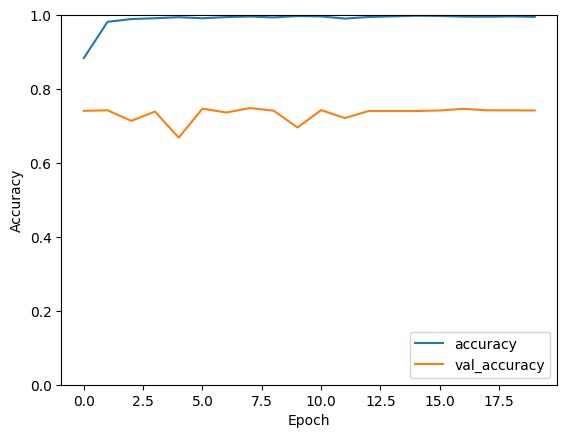

In [23]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()